In [30]:
# notes
# change Bayes Theorem to markdown

## Data Analysis
* Sampling
* Calculate likelihoods/probabilities
* Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### I. Bechdel Test Dataset 
* determine probability that a film will pass the test

In [2]:
df = pd.read_csv('my_data/updated_bechdel_4.csv')
df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.tail()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
7607,2014.0,Force Majeure,3.0,1.0,tt3630276,0.0,0.0,0.0,1.0,1.0,0.0,1358561.0
7608,2013.0,Future Shift,3.0,1.0,tt2991316,1.0,1.0,0.0,1.0,3.0,0.0,0.0
7609,2013.0,The Immigrant,3.0,1.0,tt1951181,0.0,0.0,0.0,0.0,0.0,16000000.0,5900000.0
7610,2013.0,Lost In Living,3.0,1.0,tt2628260,1.0,0.0,0.0,1.0,2.0,0.0,0.0
7611,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,1.0,0.0,0.0,2.0,0.0,0.0


In [19]:
df.shape

(7612, 12)

Add Captain Marvel to dataset because it was released after I scraped Bechdel Test website (though the revenue will not be accurate at this point). 

In [4]:
captain_marvel = pd.Series({'year': 2019.0, 'title': 'Captain Marvel', 'score': 3.0, 'passing': 1.0, 'imdb_id': 'tt4154664', 
                            'director_gender': 1.0, 'writer_gender': 1.0, 'exec_gender': 1.0, 'producer_gender': 1.0, 
                            'overall_gender': 4.0, 'budget': 160000000, 'revenue': 890000000})
captain_marvel

year                         2019
title              Captain Marvel
score                           3
passing                         1
imdb_id                 tt4154664
director_gender                 1
writer_gender                   1
exec_gender                     1
producer_gender                 1
overall_gender                  4
budget                  160000000
revenue                 890000000
dtype: object

In [5]:
df = df.append(captain_marvel, ignore_index=True)

In [6]:
df.tail()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
7608,2013.0,Future Shift,3.0,1.0,tt2991316,1.0,1.0,0.0,1.0,3.0,0.0,0.0
7609,2013.0,The Immigrant,3.0,1.0,tt1951181,0.0,0.0,0.0,0.0,0.0,16000000.0,5900000.0
7610,2013.0,Lost In Living,3.0,1.0,tt2628260,1.0,0.0,0.0,1.0,2.0,0.0,0.0
7611,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,1.0,0.0,0.0,2.0,0.0,0.0
7612,2019.0,Captain Marvel,3.0,1.0,tt4154664,1.0,1.0,1.0,1.0,4.0,160000000.0,890000000.0


In [23]:
df.passing.value_counts()

1.0    4362
0.0    3251
Name: passing, dtype: int64

In [7]:
# df.to_csv('my_data/updated_bechdel_5.csv', index=False)

In [2]:
df = pd.read_csv('my_data/updated_bechdel_5.csv')
df.tail()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
7608,2013.0,Future Shift,3.0,1.0,tt2991316,1.0,1.0,0.0,1.0,3.0,0.0,0.0
7609,2013.0,The Immigrant,3.0,1.0,tt1951181,0.0,0.0,0.0,0.0,0.0,16000000.0,5900000.0
7610,2013.0,Lost In Living,3.0,1.0,tt2628260,1.0,0.0,0.0,1.0,2.0,0.0,0.0
7611,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,1.0,0.0,0.0,2.0,0.0,0.0
7612,2019.0,Captain Marvel,3.0,1.0,tt4154664,1.0,1.0,1.0,1.0,4.0,160000000.0,890000000.0


#### Probability of randomly selected film passing

In [24]:
passing_proba = 4362/len(df)
passing_proba = round((passing_proba * 100),2)
passing_proba

57.3

#### Verify probability of randomly selected film passing with random sampling

In [29]:
sample_passing = []
for i in range(100):
    sample = df.sample(n=100, replace=True, random_state=19)
    passing = sample.passing.value_counts()[1]
    sample_passing.append(passing)

print(f'The mean passing value of 100 samples is {np.mean(sample_passing)}')

The mean passing value of 100 samples is 57.0


In [27]:
test_sample = df.sample(n=100)
print(test_sample.passing.value_counts())
print(test_sample.passing.value_counts()[1])

1.0    67
0.0    33
Name: passing, dtype: int64
67


#### Conditional Probability, Bayes Theorem, & Likelihood
Visualizations have shown that films with a director and/or writer of an underrepresented gender are more likely to pass the Test </br>
P(A|B) = P(A) * P(B|A) / P(B)

P(A) = Probability of a film passing the Bechdel Test for this dataset </br>
P(B) = Probability of a film having a director of an underrepresented gender </br>
P(C) = Probability of a film having a writer of an underrepresented gender </br>

In [34]:
director_proba = round((df.director_gender.value_counts()[1] / len(df)),2)
director_proba

0.1

In [36]:
writer_proba = round((df.writer_gender.value_counts()[1] / len(df)), 2)
writer_proba

0.16

P(A) = 0.57 </br>
P(B) = 0.1 </br>
P(C) = 0.16

#### Likelihood
P(B|A) = probability of director of underrepresented gender, given a passing test </br>
P(C|A) = probability of writer of underrepresented gender, given a passing test

In [3]:
passing_movies = df.loc[df.passing == 1]
passing_movies.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
6,2018.0,6 Balloons,3.0,1.0,tt6142496,1.0,1.0,0.0,0.0,2.0,0.0,0.0
10,2018.0,A Simple Favor,3.0,1.0,tt7040874,0.0,1.0,0.0,1.0,2.0,20000000.0,42600000.0
11,2018.0,A Star Is Born,3.0,1.0,tt1517451,0.0,1.0,0.0,0.0,1.0,36000000.0,403588149.0


In [40]:
passing_movies.shape

(4362, 12)

In [41]:
director_proba_with_passing = round((passing_movies.director_gender.value_counts()[1] / len(passing_movies)),2)
director_proba_with_passing

0.14

In [44]:
writer_proba_with_passing = round((passing_movies.writer_gender.value_counts()[1] / len(passing_movies)), 2)
writer_proba_with_passing

0.22

P(B|A) = 0.14 </br>
P(C|A) = 0.22

In [45]:
proba_passing_with_director = (0.57 * 0.14) / 0.1
proba_passing_with_director

0.7979999999999999

In [46]:
proba_passing_with_writer = (0.57 * 0.22) / 0.16
proba_passing_with_writer

0.7837499999999998

P(A|B) = probability of passing test, given director of underrepresented gender = 0.8 </br>
P(A|C) = probability of passing test, given writer of underrepresented gender = 0.78

#### Passing and non-passing films and producer gender

In [4]:
df.exec_gender.value_counts()

0.0    7446
1.0     167
Name: exec_gender, dtype: int64

In [5]:
df.producer_gender.value_counts()

0.0    6449
1.0    1164
Name: producer_gender, dtype: int64

#### Combine executive producer and producer columns 
The different types of producers are not always explicit when listed in datasets or on websites. Would provide better insight to just have one type of producer, and if there is any producer of an underrepresented gender, the movie gets one point. 

In [15]:
id_exec_gender = dict(zip(df.imdb_id, df.exec_gender))   

In [16]:
new_producer_vals = []
for id, gender_val in zip(df.imdb_id, df.producer_gender):
    if id_exec_gender[id] == 0:
        if gender_val == 0:
            new_producer_vals.append(0)
        else:
            new_producer_vals.append(1)
    else:
        new_producer_vals.append(1)

In [17]:
# confirm
new_producer_vals[:25]

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]

In [18]:
# confirm
df[:25]

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,3.597000e+08
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.000000e+00
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,0.0,1.0,1.0,0.0,0.000000e+00
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
5,2019.0,Serenity,1.0,0.0,tt6476140,0.0,0.0,0.0,0.0,0.0,25000000.0,0.000000e+00
6,2018.0,6 Balloons,3.0,1.0,tt6142496,1.0,1.0,0.0,0.0,2.0,0.0,0.000000e+00
7,2018.0,A private war,1.0,0.0,tt2368254,0.0,0.0,0.0,1.0,1.0,0.0,0.000000e+00
8,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17000000.0,2.591683e+08
9,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17000000.0,3.409394e+08


In [ ]:
# make into function if needed   

In [19]:
df['new_producer_vals'] = new_producer_vals

In [20]:
df.tail()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue,new_producer_vals
7608,2013.0,Future Shift,3.0,1.0,tt2991316,1.0,1.0,0.0,1.0,3.0,0.0,0.0,1
7609,2013.0,The Immigrant,3.0,1.0,tt1951181,0.0,0.0,0.0,0.0,0.0,16000000.0,5900000.0,0
7610,2013.0,Lost In Living,3.0,1.0,tt2628260,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1
7611,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0
7612,2019.0,Captain Marvel,3.0,1.0,tt4154664,1.0,1.0,1.0,1.0,4.0,160000000.0,890000000.0,1


In [25]:
# df['director_gender'] + df['writer_gender'] + df['new_producer_vals'] = df['new_overall_gender']
director_vals = [1 if val else 0 for val in df.director_gender.values]

In [31]:
writer_vals = [1 if val else 0 for val in df.writer_gender.values]
# director_vals + writer_values + new_producer_vals = new_overall_vals

In [39]:
df['new_overall_gender'] = df['director_gender'] + df['writer_gender'] + df['new_producer_vals']

In [42]:
df.drop(columns=['producer_gender', 'overall_gender'], inplace=True)

In [44]:
passing_movies = df.query('passing == 1')
non_passing_movies = df.query('passing == 0')
print(passing_movies.shape)
print(non_passing_movies.shape)

(4362, 12)
(3251, 12)


In [46]:
producer_proba_passing = passing_movies.new_producer_vals.value_counts()[1] / len(passing_movies)
print(producer_proba_passing)
producer_proba_non_passing = non_passing_movies.new_producer_vals.value_counts()[1] / len(non_passing_movies)
print(producer_proba_non_passing)

0.1893626776707932
0.1344201784066441


#### Check conditional probability of film passing with producer of underrepresented gender
P(A|D) = probability of a film passing, given producer of underrepresented gender 

In [47]:
proba_d_given_a = round(producer_proba_passing, 2)
proba_d_given_a

0.19

In [48]:
# P(A|D) = P(A) * P(D|A) / P(D)
# proba_d = probability of producer of underrepresented gender in this dataset
proba_d = round((df.new_producer_vals.value_counts()[1] / len(df)), 2)
proba_d

0.17

In [51]:
# P(A|D)
round(((0.57 * 0.19) / 0.17),2)

0.64

In [52]:
df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,budget,revenue,new_producer_vals,new_overall_gender
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,170000000.0,359700000.0,0,1.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,0.0,0,2.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,0.0,0.0,0.0,1,1.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0.0,0.0,0.0,0,0.0


In [55]:
# re-name, re-order columns, save as new csv
# df.drop(columns=['exec_gender'],inplace=True)
# df.head()
df.rename({'new_producer_vals': 'producer_gender', 'new_overall_gender': 'overall_gender'}, axis=1, inplace=True)

In [57]:
new_col_order = ['year', 'title', 'score', 'passing', 'imdb_id', 'director_gender', 'writer_gender', 'producer_gender', \
                'overall_gender', 'budget', 'revenue']
df = df[new_col_order]

In [58]:
df.tail()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
7608,2013.0,Future Shift,3.0,1.0,tt2991316,1.0,1.0,1,3.0,0.0,0.0
7609,2013.0,The Immigrant,3.0,1.0,tt1951181,0.0,0.0,0,0.0,16000000.0,5900000.0
7610,2013.0,Lost In Living,3.0,1.0,tt2628260,1.0,0.0,1,2.0,0.0,0.0
7611,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,1.0,0,2.0,0.0,0.0
7612,2019.0,Captain Marvel,3.0,1.0,tt4154664,1.0,1.0,1,3.0,160000000.0,890000000.0


In [59]:
df.to_csv('my_data/updated_bechdel_6.csv', index=False)

In [61]:
df.query("imdb_id == 'tt1631867'")

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
959,2014.0,Edge of Tomorrow,1.0,0.0,tt1631867,0.0,0.0,0,0.0,178000000.0,370500000.0


## II. Hypothesis Testing - is there a significant difference in budget and/or revenue in passing vs. non-passing movies?

Analyze only those movies in the dataset that have a non-zero budget and revenue.

In [8]:
budget_revenue_df = pd.read_csv('my_data/non_zero_scaled_budgets_revenues_2.csv')
budget_revenue_df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget_millions,revenue_millions
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170.0,359.700000
1,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17.0,259.168321
2,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17.0,340.939361
3,2018.0,A Simple Favor,3.0,1.0,tt7040874,0.0,1.0,0.0,1.0,2.0,20.0,42.600000
4,2018.0,A Star Is Born,3.0,1.0,tt1517451,0.0,1.0,0.0,0.0,1.0,36.0,403.588149


In [41]:
budget_revenue_df.shape

(3499, 12)

### Hypothesis 1
* H0 - There is no statistically significant difference between the budgets of films that pass the Bechdel Test and films that do not pass the Bechdel Test. </br>
    * $H_0$: $\mu_1$ = $\mu_2$
* H1 - There is a statistically significant difference bettween the budgets of films that pass the Bechdel Test and films that do not pass the Bechdel Test.
    * $H_a$: $\mu_1$ $\neq$ $\mu_2$  

#### Budget Distributions

In [9]:
import plotly.figure_factory as ff

In [11]:
passing_movies = budget_revenue_df.query('passing == 1')
passing_movies.shape

(1904, 12)

In [12]:
non_passing_movies = budget_revenue_df.query('passing == 0')
non_passing_movies.shape

(1595, 12)

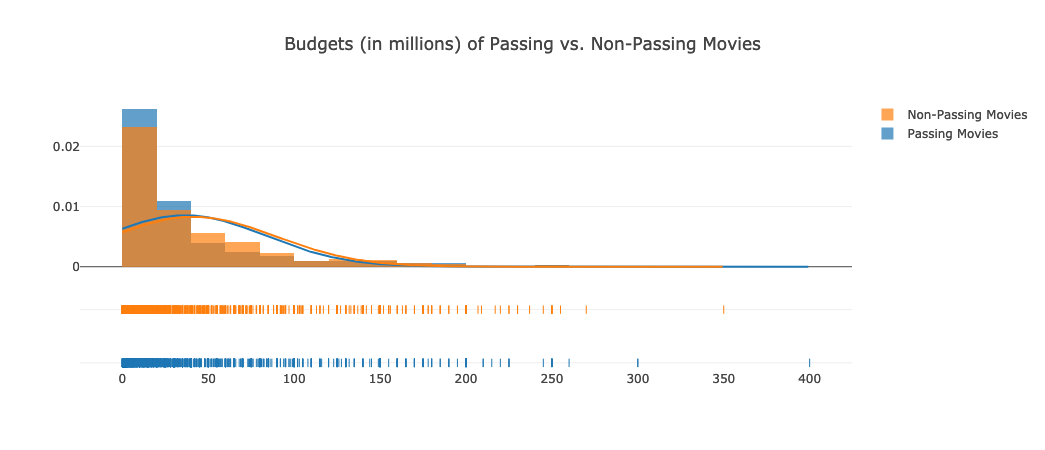

In [28]:
x1 = passing_movies.budget_millions
x2 = non_passing_movies.budget_millions

hist_data = [x1, x2]
labels = ['Passing Movies', 'Non-Passing Movies']

fig = ff.create_distplot(hist_data, labels, curve_type='normal', bin_size=20)
fig['layout'].update(title='Budgets (in millions) of Passing vs. Non-Passing Movies')
iplot(fig)

In [20]:
from scipy import stats

In [21]:
x1_mu = passing_movies.budget_millions.mean()
x2_mu = non_passing_movies.budget_millions.mean()

x1_var = passing_movies.budget_millions.std()
x2_var = non_passing_movies.budget_millions.std()

print(f'Mean budget of passing movies: {x1_mu}')
print(f'Mean budget of non-passing movies: {x2_mu}')
print(f'Variance in budgets of passing movies: {x1_var}')
print(f'Variance in budgets on non-passing movies: {x2_var}')

Mean budget of passing movies: 36.34017572452731
Mean budget of non-passing movies: 41.38629381065831
Variance in budgets of passing movies: 46.648005131918026
Variance in budgets on non-passing movies: 48.03875617001384


In [30]:
# Check log-normal distributions

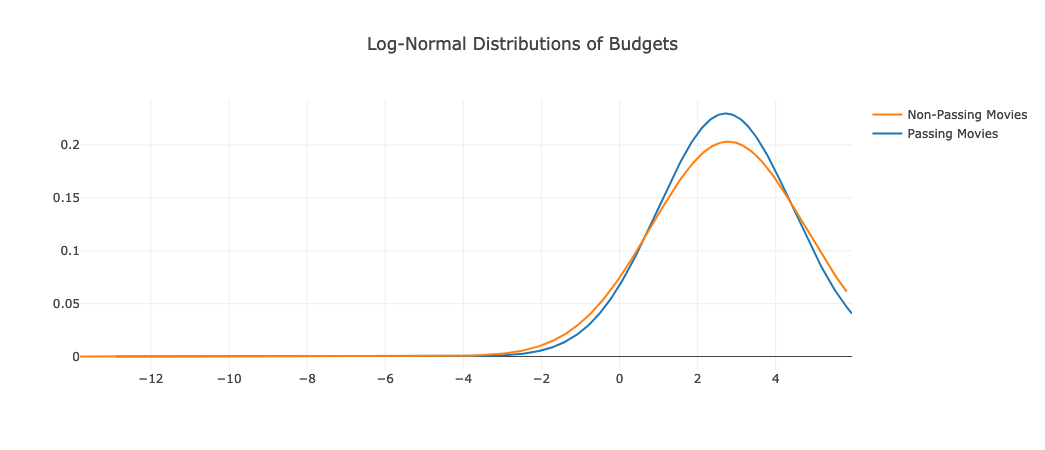

In [31]:
x1 = passing_movies.budget_millions
x2 = non_passing_movies.budget_millions

hist_data = [np.log(x1), np.log(x2)]
labels = ['Passing Movies', 'Non-Passing Movies']

fig = ff.create_distplot(hist_data, labels, curve_type='normal', show_hist=False, show_rug=False, bin_size=20)
fig['layout'].update(title='Log-Normal Distributions of Budgets')
iplot(fig)

In [33]:
t,p = stats.ttest_ind(x1, x2)
if p < 0.05:
    print(f'With a p-value of {p}, the null hypothesis that there is no statistically significant difference in the budgets \
    of passing vs. non-passing movies can be rejected.')
else:
    print(f'With a p-value of {p}, the null hypothesis that there is no statistically significant difference in the budgets \
    of passing vs. non-passing movies cannot be rejected.')

With a p-value of 0.0016815624295128007, the null hypothesis that there is no statistically significant difference in the budgets     of passing vs. non-passing movies can be rejected.


### Hypothesis 2
* H0 - There is no statistically significant difference between the revenues of films that pass the Bechdel Test and films that do not pass the Bechdel Test. </br>
    * $H_0$: $\mu_1$ = $\mu_2$
* H2 - There is a statistically significant difference bettween the revenues of films that pass the Bechdel Test and films that do not pass the Bechdel Test.
    * $H_a$: $\mu_1$ $\neq$ $\mu_2$  

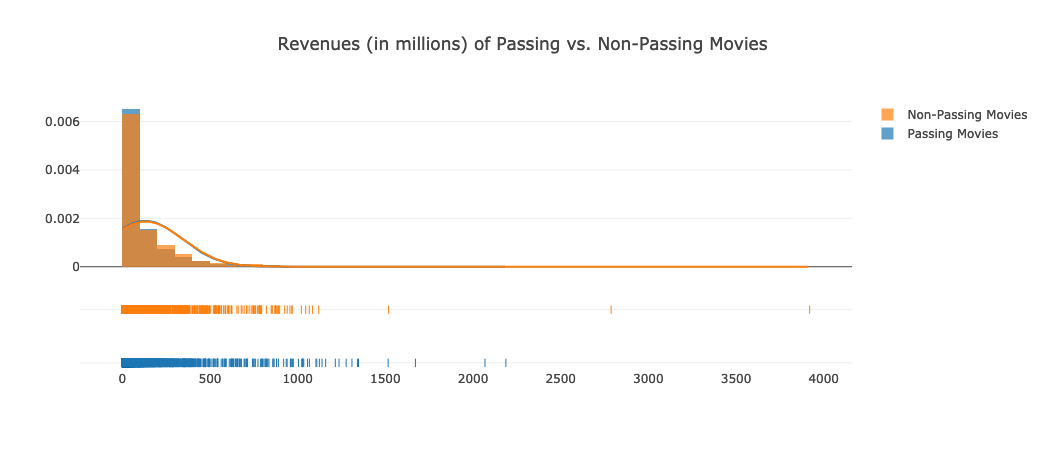

In [37]:
x1 = passing_movies.revenue_millions
x2 = non_passing_movies.revenue_millions

hist_data = [x1, x2]
labels = ['Passing Movies', 'Non-Passing Movies']

fig = ff.create_distplot(hist_data, labels, curve_type='normal', bin_size=100)
fig['layout'].update(title='Revenues (in millions) of Passing vs. Non-Passing Movies')
iplot(fig)

In [38]:
x1_mu = passing_movies.revenue_millions.mean()
x2_mu = non_passing_movies.revenue_millions.mean()

x1_var = passing_movies.revenue_millions.std()
x2_var = non_passing_movies.revenue_millions.std()

print(f'Mean revenue of passing movies: {x1_mu}')
print(f'Mean revenue of non-passing movies: {x2_mu}')
print(f'Variance in revenues of passing movies: {x1_var}')
print(f'Variance in revenues on non-passing movies: {x2_var}')

Mean revenue of passing movies: 130.4792080787374
Mean revenue of non-passing movies: 132.89137380077995
Variance in revenues of passing movies: 210.3555686553133
Variance in revenues on non-passing movies: 213.36499951256891


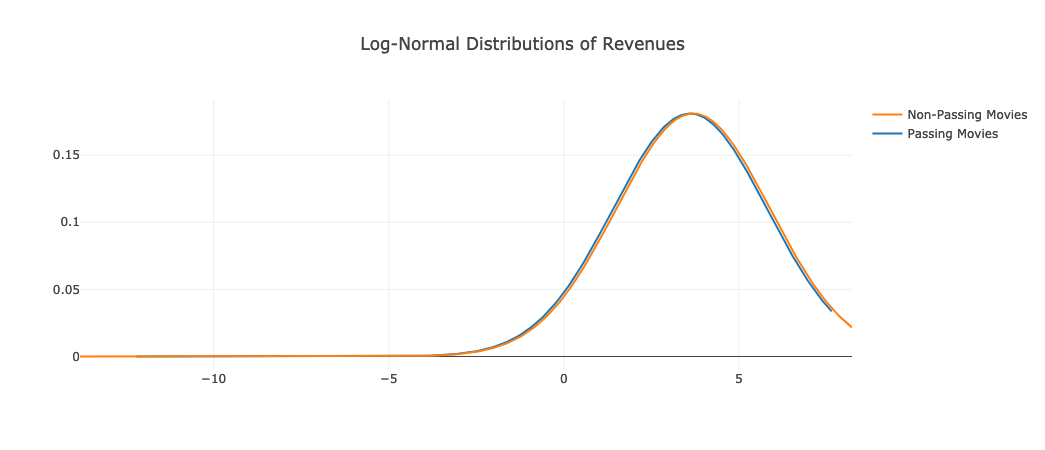

In [39]:
x1 = passing_movies.revenue_millions
x2 = non_passing_movies.revenue_millions

hist_data = [np.log(x1), np.log(x2)]
labels = ['Passing Movies', 'Non-Passing Movies']

fig = ff.create_distplot(hist_data, labels, curve_type='normal', show_hist=False, show_rug=False, bin_size=20)
fig['layout'].update(title='Log-Normal Distributions of Revenues')
iplot(fig)

In [40]:
t,p = stats.ttest_ind(x1, x2)
if p < 0.05:
    print(f'With a p-value of {p}, the null hypothesis that there is no statistically significant difference in the revenues \
    of passing vs. non-passing movies can be rejected.')
else:
    print(f'With a p-value of {p}, the null hypothesis that there is no statistically significant difference in the revenues \
    of passing vs. non-passing movies cannot be rejected.')

With a p-value of 0.737169786989613, the null hypothesis that there is no statistically significant difference in the revenues     of passing vs. non-passing movies cannot be rejected.


### Conclusion of Hypothesis Tests
Based on hypothesis testing for this dataset of 3499 movies with budget and revenue values, movies that pass the Bechdel Test have a lower average budget than movies that do not pass the Bechdel Test, but the different in revenue of these two groups of movies is not statistically significant. 

## III. Gender Distribution in the U.S. population, movie goers, and the entertainment industry

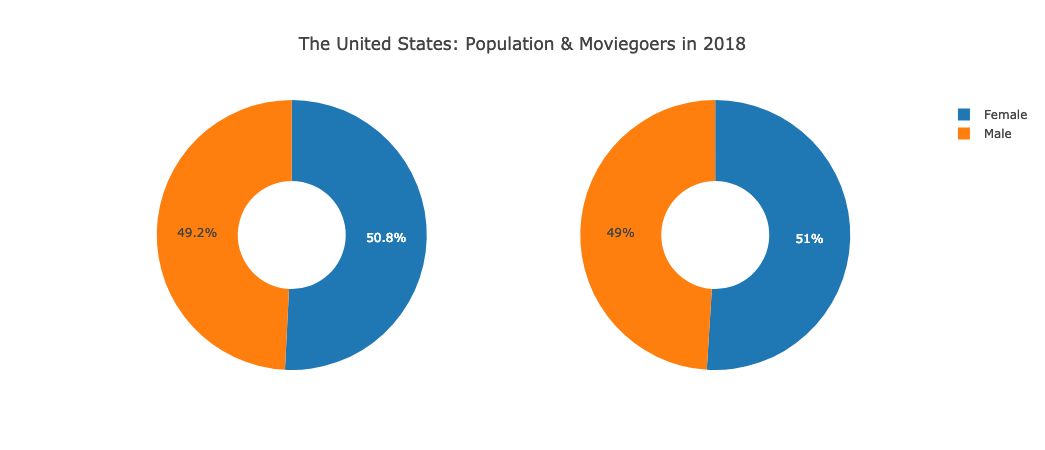

In [48]:
fig = {
    "data": [
        {
            "values": [49.2, 50.8],
            "labels": ["Male", "Female"],
            "name": "U.S. Population, according to Census Bureau",
            "hole": 0.4,
            "type": "pie",
            "domain": {"x": [0, 0.5]}
        },
        {
            "values": [49, 51],
            "labels": ["Male", "Female"],
            "name": "U.S. Moviegoers, according to MPAA",
            "hole": 0.4,
            "type": "pie",
            "domain": {"x": [0.5, 1]}
        }
    ],
    "layout": {
        "title": "The United States: Population & Moviegoers in 2018"
    }
}

iplot(fig)

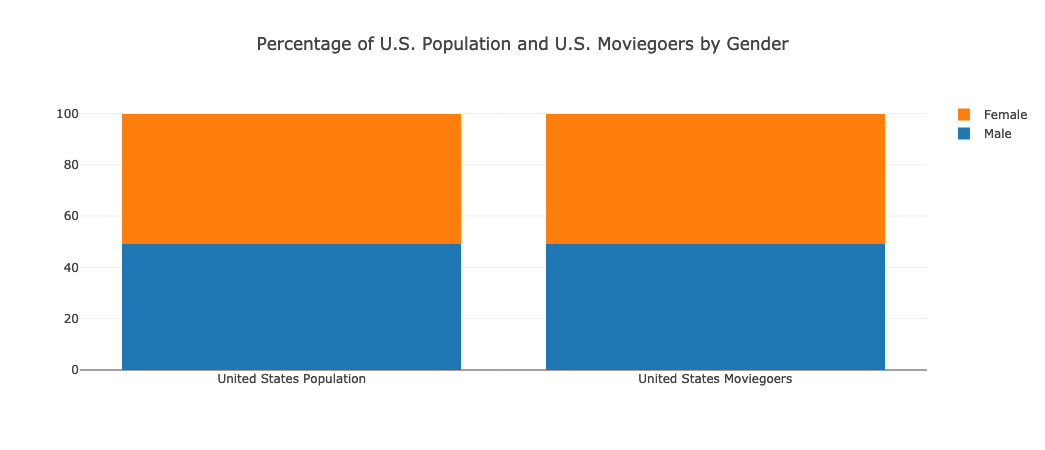

In [104]:
x = ["United States Population", "United States Moviegoers"]
y_male = [49.2,49]
y_female = [50.8,51]

trace1 = go.Bar(x=x, y=y_male, name="Male")
trace2 = go.Bar(x=x, y=y_female, name="Female")

data = [trace1, trace2]

layout = go.Layout(
    title="Percentage of U.S. Population and U.S. Moviegoers by Gender",
    barmode="stack"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

The U.S. Census Bureau specifically asks respondents for their biological sex, and the MPAA uses a survey that asks moviegoers for their gender. The two surveys for 2018 show nearly identical percentages for males and females. 

### How to Analyze Gender Distribution in the Industry? 
One high-profile way to gauge gender and other forms of diversity in the film industry is by analyzing nominees and winners of awards shows. The 91st Academy Awards were held in February 2019 to recognize films released in 2018. The membership roster of the Academy is not publicized, but the members decide which of their peers in the film industry will be nominated and recognized for their work. Women have been involved with the Academy since its inception in 1927, though there was only one female award winner at the 1st Academy Awards - in the Best Actress Category. Since the non-acting categories are not divided by gender, the nominees and winners of these categories present a clearer picture of representation than the acting categories. 

#### The following statistics on the 91st Academy Awards were published by the Women's Media Center.

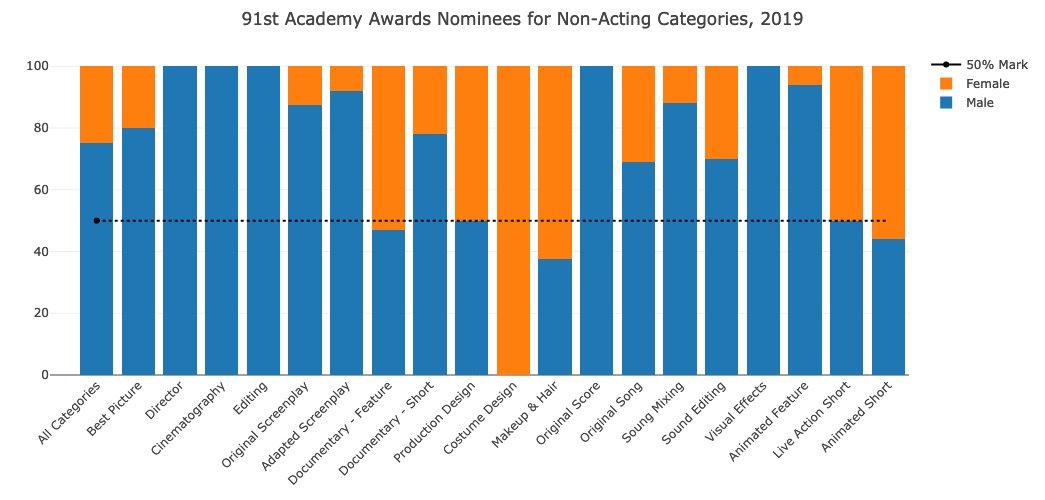

In [103]:
categories = ["All Categories", "Best Picture", "Director", "Cinematography", "Editing",
             "Original Screenplay", "Adapted Screenplay", "Documentary - Feature", "Documentary - Short", "Production Design",
             "Costume Design", "Makeup & Hair", "Original Score", "Original Song", "Soung Mixing", "Sound Editing",
             "Visual Effects", "Animated Feature", "Live Action Short", "Animated Short"]

y_male = [75,80,100,100,100,87.5,92,47,78,50,0,37.5,100,69,88,70,100,94,50,44]
y_female = [25,20,0,0,0,12.5,8,53,22,50,100,62.5,0,31,12,30,0,6,50,56]

trace1 = go.Bar(x=categories, y=y_male, name="Male")
trace2 = go.Bar(x=categories, y=y_female, name="Female")

trace3 = go.Scatter(x=categories, 
                    y=[50], 
                    name="50% Mark",
                    text="50%",
                    line=dict(
                    color="rgb(0,0,0)")
                    )

data = [trace1, trace2, trace3]

layout = go.Layout(
    title="91st Academy Awards Nominees for Non-Acting Categories, 2019",
    barmode= "stack",
    xaxis = dict(
        tickangle=-45
    ),
    shapes=[
        {
        "type": "line",
        "y0":50,
        "x0":"All Categories",
        "y1":50,
        "x1":"Animated Short",
            "line": {
                "dash":"dot",
                "color":"black"
            }
        }
    ],
    autosize=False,
    width=1000,
    height=500,
    margin = go.layout.Margin(
        l=50,
        r=50,
        t=50,
        b=125
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [2]:
df = pd.read_csv('my_data/lowercase_bechdel_7.csv')
df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,alita: battle angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170000000.0,359700000.0
1,2019.0,close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.0
2,2019.0,cold pursuit,1.0,0.0,tt5719748,0.0,0.0,0,0.0,0.0,0.0
3,2019.0,the kid who would be king,1.0,0.0,tt6811018,0.0,0.0,1,1.0,0.0,0.0
4,2019.0,polar,2.0,0.0,tt4139588,0.0,0.0,0,0.0,0.0,0.0


In [4]:
row = df[df.title == 'close']
row

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
1,2019.0,close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.0


In [5]:
row_2 = df[df.title == 'avatar']
row_2

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
2563,2009.0,avatar,2.0,0.0,tt0499549,0.0,0.0,0,0.0,237000000.0,2.787965e+09


In [10]:
final_df = pd.concat([row, row_2])
final_df

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
1,2019.0,close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.000000e+00
2563,2009.0,avatar,2.0,0.0,tt0499549,0.0,0.0,0,0.0,237000000.0,2.787965e+09


In [14]:
rows = [row, row_2]
something = pd.concat(rows)
something

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
1,2019.0,close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.000000e+00
2563,2009.0,avatar,2.0,0.0,tt0499549,0.0,0.0,0,0.0,237000000.0,2.787965e+09


In [12]:
final

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
2563,2009.0,avatar,2.0,0.0,tt0499549,0.0,0.0,0,0.0,237000000.0,2.787965e+09


In [20]:
example_movies = "pride and prejudice, thor: ragnarok, thor"
split_movie_list = example_movies.split(',')
# split_movie_list
strippled_movie_list = [m.strip() for m in split_movie_list]
strippled_movie_list

['pride and prejudice', 'thor:ragnarok', 'thor']

In [22]:
sample_title = ' thor: ragnarok'
df[df.title == sample_title.strip()]

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
276,2017.0,thor: ragnarok,1.0,0.0,tt3501632,0.0,0.0,1,1.0,180000000.0,853408372.0


In [25]:
# sample_numbered_rows = []
# for i,m in enumerate(strippled_movie_list):
#     print(row + str(i))

In [40]:
def build_custom_df(movie_titles):
    
    split_movie_list = []
    stripped_movie_list = []
    row_list = []
    final_df = pd.DataFrame()
    
    if ',' not in movie_titles:
        stripped_movie = movie_titles.strip().lower()
        final_df = df[df.title == stripped_movie]
    
    else:
        split_movie_list = movie_titles.split(',')
        stripped_movie_list = [m.strip().lower() for m in split_movie_list]
        final_df = df[df.title.isin(stripped_movie_list)]
        
    return final_df

In [42]:
sample_list = 'avatar'
build_custom_df(sample_list)

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
2563,2009.0,avatar,2.0,0.0,tt0499549,0.0,0.0,0,0.0,237000000.0,2.787965e+09


In [44]:
def update_table(movie):
    selected_df = build_custom_df(movie)
    return selected_df

In [45]:
update_table('avatar')

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
2563,2009.0,avatar,2.0,0.0,tt0499549,0.0,0.0,0,0.0,237000000.0,2.787965e+09
